In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
sample = pd.read_csv('Dane/disaster_tweets/sample_submission.csv')
train = pd.read_csv('Dane/disaster_tweets/train.csv')
test = pd.read_csv('Dane/disaster_tweets/test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
train[train['target'] == 1].head(25)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [7]:
train[train['target'] == 0]['text'].values[1]

'I love fruits'

In [8]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

The words contained in each tweet are a good indicator of whether they're about a real disaster or not

In [9]:
count_vectorizer = feature_extraction.text.CountVectorizer()

Let's get counts for the first 5 tweets in the data

In [10]:
example_train_vectors = count_vectorizer.fit_transform(train["text"][0:5])

We use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)

In [11]:
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


The above tells us that:

* There are 54 unique words (or "tokens") in the first five tweets.
* The first tweet contains only some of those unique tokens - all of the non-zero counts above are the tokens that DO exist in the first tweet.

In [12]:
train_vectors = count_vectorizer.fit_transform(train["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test["text"])

In [13]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

In [14]:
scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv=3, scoring="f1")
scores

array([0.60355649, 0.57580105, 0.64485082])

In [15]:
clf.fit(train_vectors, train["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [16]:
sample['target'] = clf.predict(test_vectors)

In [17]:
sample.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


## OCR test - easyocr

In [18]:
# !pip install opencv-python-headless==4.1.2.30
# !pip3 install torch torchvision torchaudio
# !pip install easyocr

In [19]:
# Import Reader from easyocr 
from easyocr import Reader

D:\Progs\Media\Anaconda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [20]:
# Load model for English and Spanish
# available languages: https://www.jaided.ai/easyocr/
reader_en_es = Reader(['en', 'es'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [21]:
def read_text(image_name, model_name, in_line=True):
    text = model_name.readtext(image_name, detail = 0, paragraph=in_line)
    return '\n'.join(text)

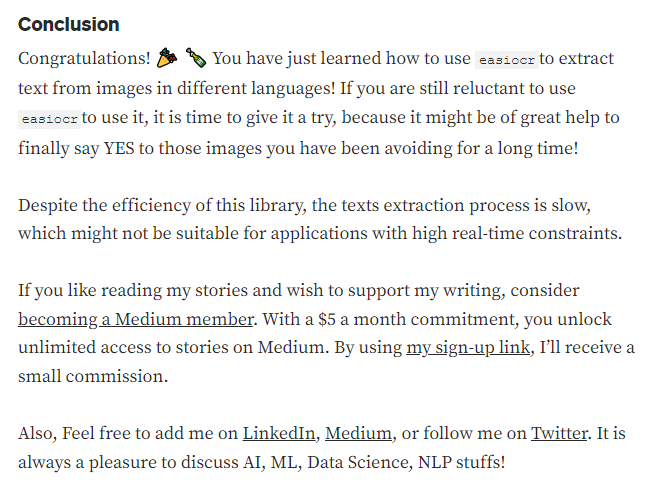

In [22]:
from IPython.display import Image
Image(filename='sample_ocr_example.png') 

In [23]:
eng_sample_text = read_text('sample_ocr_example.png', reader_en_es)
print(eng_sample_text)

Conclusion Congratulations! You have just learned how to use ea3_ccr [O extract text from images in different languages! If you are still reluctant to use easiccz to use it, it is time to give it a try because it might be of great help to finally say YES to those images you have been avoiding for a long time!
Despite the efficiency of this library; the texts extraction process is slow; which might not be suitable for applications with high real-time constraints.
If you like reading my stories and wish to support my writing; consider becoming_ Medium member: With a $5 a month commitment, you unlock unlimited access to stories on Medium. By using my signuplink; Ill receive a small commission
Also, Feel free to add me on LinkedIn Medium, or follow me on Iwitter: It is always a pleasure to discuss AI, ML, Data Science; NLP stuffs:


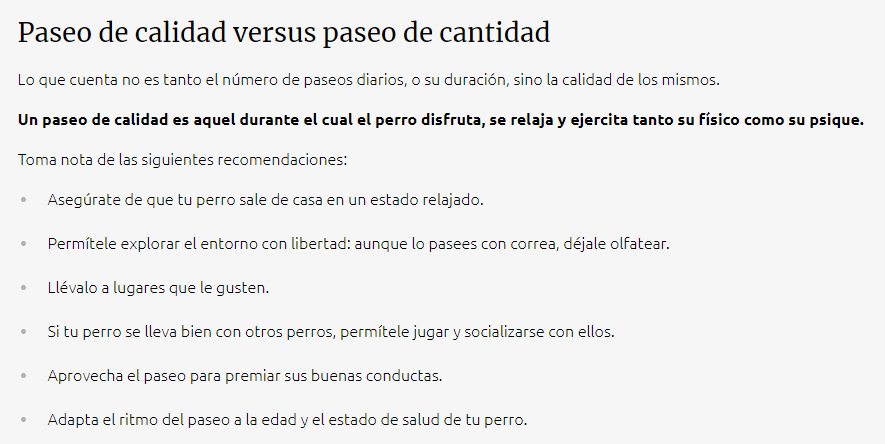

In [24]:
Image(filename='ejemplo_espanol_texto.png') 

In [25]:
esp_sample_text = read_text('ejemplo_espanol_texto.png', reader_en_es)
print(esp_sample_text)

Paseo de calidad versus paseo de cantidad Lo cue cuenta no es tanto elnúmero de paseos diarios, 0 S0 duración, sinc la calicad de los mismos
Un paseo de calidad es aquel durante el cual el perro disfruta_ relaja y ejercita tanto su físico como su psique.
Toma nota de las siguientes recomencaciones:
AsegúrateCeque tu perro sale de casa en un estado relajado.
Permítele explorar elentorno con libertac:auncue lo Pasees con correa, Céjale olfatear
Llévalo lugares que legusten
Si tu Perro se lleva bien con otros Perros, Permítele jugar y socializarse con ellos
Aprovecha elPaseo para premiar sus buenas concuctas_
Adapta elritmo del paseo la edac yelestado Ce saluc ce tu perro.


## Spam Detection Project

In [26]:
import numpy as np
import pandas as pd

In [27]:
sample = pd.read_csv('Dane/Spam_email_raw_text.csv')

In [28]:
sample

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
5,1,------=_NextPart_000_00B8_51E06B6A.C8586B31\n\...,00187.efd97ab2034b3384606e21db00014ecb
6,1,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",00500.85b72f09f6778a085dc8b6821965a76f
7,1,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...,00493.1c5f59825f7a246187c137614fb1ea82
8,1,"<table width=""600"" border=""20"" align=""center"" ...",00012.381e4f512915109ba1e0853a7a8407b2
9,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",00487.139a2f4e8edbbdd64441536308169d74


## Krish Naik Live Day 2

In [29]:
!pip install nltk

You should consider upgrading via the 'd:\progs\media\anaconda\python.exe -m pip install --upgrade pip' command.


In [30]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [31]:
paragraph = ''' Barcelona is a city on the coast of northeastern Spain. It is the capital and largest city of the autonomous community of Catalonia, as well as the second most populous municipality of Spain. With a population of 1.6 million within city limits,[7] its urban area extends to numerous neighbouring municipalities within the Province of Barcelona and is home to around 4.8 million people,[3] making it the fifth most populous urban area in the European Union after Paris, the Ruhr area, Madrid, and Milan.[3] It is one of the largest metropolises on the Mediterranean Sea, located on the coast between the mouths of the rivers Llobregat and Besòs, and bounded to the west by the Serra de Collserola mountain range, the tallest peak of which is 512 metres (1,680 feet) high.
Founded as a Roman city, in the Middle Ages Barcelona became the capital of the County of Barcelona. After joining with the Kingdom of Aragon to form the confederation of the Crown of Aragon, Barcelona, which continued to be the capital of the Principality of Catalonia, became the most important city in the Crown of Aragon and the main economic and administrative centre of the Crown, only to be overtaken by Valencia, wrested from Arab domination by the Catalans, shortly before the dynastic union between the Crown of Castile and the Crown of Aragon in 1492. Barcelona has a rich cultural heritage and is today an important cultural centre and a major tourist destination. Particularly renowned are the architectural works of Antoni Gaudí and Lluís Domènech i Montaner, which have been designated UNESCO World Heritage Sites. The city is home to two of the most prestigious universities in Spain: the University of Barcelona and Pompeu Fabra University. The headquarters of the Union for the Mediterranean are located in Barcelona. The city is known for hosting the 1992 Summer Olympics as well as world-class conferences and expositions and also many international sport tournaments.'''

In [32]:
nltk.download('punkt')
sentences = nltk.sent_tokenize(paragraph)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
sentences

[' Barcelona is a city on the coast of northeastern Spain.',
 'It is the capital and largest city of the autonomous community of Catalonia, as well as the second most populous municipality of Spain.',
 'With a population of 1.6 million within city limits,[7] its urban area extends to numerous neighbouring municipalities within the Province of Barcelona and is home to around 4.8 million people,[3] making it the fifth most populous urban area in the European Union after Paris, the Ruhr area, Madrid, and Milan.',
 '[3] It is one of the largest metropolises on the Mediterranean Sea, located on the coast between the mouths of the rivers Llobregat and Besòs, and bounded to the west by the Serra de Collserola mountain range, the tallest peak of which is 512 metres (1,680 feet) high.',
 'Founded as a Roman city, in the Middle Ages Barcelona became the capital of the County of Barcelona.',
 'After joining with the Kingdom of Aragon to form the confederation of the Crown of Aragon, Barcelona, wh

In [34]:
stemmer = PorterStemmer()

In [35]:
stemmer.stem('university')

'univers'

In [36]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [37]:
lemmatizer = WordNetLemmatizer()

In [38]:
lemmatizer.lemmatize('expositions')

'exposition'

In [39]:
import re

In [40]:
corpus = []

for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    corpus.append(review)

In [60]:
corpus

[' barcelona is a city on the coast of northeastern spain ',
 'it is the capital and largest city of the autonomous community of catalonia  as well as the second most populous municipality of spain ',
 'with a population of     million within city limits     its urban area extends to numerous neighbouring municipalities within the province of barcelona and is home to around     million people     making it the fifth most populous urban area in the european union after paris  the ruhr area  madrid  and milan ',
 '    it is one of the largest metropolises on the mediterranean sea  located on the coast between the mouths of the rivers llobregat and bes s  and bounded to the west by the serra de collserola mountain range  the tallest peak of which is     metres        feet  high ',
 'founded as a roman city  in the middle ages barcelona became the capital of the county of barcelona ',
 'after joining with the kingdom of aragon to form the confederation of the crown of aragon  barcelona  wh

## Stemming

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
for i in corpus:
    words = nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(stemmer.stem(word))

barcelona
citi
coast
northeastern
spain
capit
largest
citi
autonom
commun
catalonia
well
second
popul
municip
spain
popul
million
within
citi
limit
urban
area
extend
numer
neighbour
municip
within
provinc
barcelona
home
around
million
peopl
make
fifth
popul
urban
area
european
union
pari
ruhr
area
madrid
milan
one
largest
metropolis
mediterranean
sea
locat
coast
mouth
river
llobregat
be
bound
west
serra
de
collserola
mountain
rang
tallest
peak
metr
feet
high
found
roman
citi
middl
age
barcelona
becam
capit
counti
barcelona
join
kingdom
aragon
form
confeder
crown
aragon
barcelona
continu
capit
princip
catalonia
becam
import
citi
crown
aragon
main
econom
administr
centr
crown
overtaken
valencia
wrest
arab
domin
catalan
shortli
dynast
union
crown
castil
crown
aragon
barcelona
rich
cultur
heritag
today
import
cultur
centr
major
tourist
destin
particularli
renown
architectur
work
antoni
gaud
llu
dom
nech
montan
design
unesco
world
heritag
site
citi
home
two
prestigi
univers
spain
univers
ba

### Printing all English stopwords

In [43]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmatization

In [44]:
for i in corpus:
    words = nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(lemmatizer.lemmatize(word))

barcelona
city
coast
northeastern
spain
capital
largest
city
autonomous
community
catalonia
well
second
populous
municipality
spain
population
million
within
city
limit
urban
area
extends
numerous
neighbouring
municipality
within
province
barcelona
home
around
million
people
making
fifth
populous
urban
area
european
union
paris
ruhr
area
madrid
milan
one
largest
metropolis
mediterranean
sea
located
coast
mouth
river
llobregat
be
bounded
west
serra
de
collserola
mountain
range
tallest
peak
metre
foot
high
founded
roman
city
middle
age
barcelona
became
capital
county
barcelona
joining
kingdom
aragon
form
confederation
crown
aragon
barcelona
continued
capital
principality
catalonia
became
important
city
crown
aragon
main
economic
administrative
centre
crown
overtaken
valencia
wrested
arab
domination
catalan
shortly
dynastic
union
crown
castile
crown
aragon
barcelona
rich
cultural
heritage
today
important
cultural
centre
major
tourist
destination
particularly
renowned
architectural
work
an

## Bag of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [46]:
X = cv.fit_transform(corpus)
cv.vocabulary_

{'barcelona': 15,
 'is': 68,
 'city': 29,
 'on': 102,
 'the': 131,
 'coast': 31,
 'of': 100,
 'northeastern': 98,
 'spain': 127,
 'it': 69,
 'capital': 24,
 'and': 5,
 'largest': 74,
 'autonomous': 14,
 'community': 33,
 'catalonia': 27,
 'as': 13,
 'well': 143,
 'second': 123,
 'most': 91,
 'populous': 112,
 'municipality': 95,
 'with': 146,
 'population': 111,
 'million': 89,
 'within': 147,
 'limits': 75,
 'its': 70,
 'urban': 141,
 'area': 11,
 'extends': 49,
 'to': 132,
 'numerous': 99,
 'neighbouring': 97,
 'municipalities': 94,
 'province': 115,
 'home': 63,
 'around': 12,
 'people': 109,
 'making': 82,
 'fifth': 52,
 'in': 66,
 'european': 47,
 'union': 138,
 'after': 1,
 'paris': 106,
 'ruhr': 121,
 'madrid': 79,
 'milan': 88,
 'one': 103,
 'metropolises': 86,
 'mediterranean': 84,
 'sea': 122,
 'located': 78,
 'between': 21,
 'mouths': 93,
 'rivers': 119,
 'llobregat': 76,
 'bes': 20,
 'bounded': 22,
 'west': 144,
 'by': 23,
 'serra': 124,
 'de': 40,
 'collserola': 32,
 'moun

In [47]:
corpus[0]

' barcelona is a city on the coast of northeastern spain '

In [48]:
X[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

#### Można skorzystać z argumentu `binary = True`

If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

In [49]:
cv = CountVectorizer(binary = True, ngram_range=(3,3))
X = cv.fit_transform(corpus)
cv.vocabulary_

{'barcelona is city': 40,
 'is city on': 113,
 'city on the': 68,
 'on the coast': 179,
 'the coast of': 215,
 'coast of northeastern': 71,
 'of northeastern spain': 168,
 'it is the': 121,
 'is the capital': 118,
 'the capital and': 210,
 'capital and largest': 55,
 'and largest city': 13,
 'largest city of': 127,
 'city of the': 67,
 'of the autonomous': 169,
 'the autonomous community': 209,
 'autonomous community of': 35,
 'community of catalonia': 73,
 'of catalonia as': 165,
 'catalonia as well': 59,
 'as well as': 33,
 'well as the': 262,
 'as the second': 32,
 'the second most': 237,
 'second most populous': 202,
 'most populous municipality': 148,
 'populous municipality of': 190,
 'municipality of spain': 154,
 'with population of': 268,
 'population of million': 189,
 'of million within': 167,
 'million within city': 145,
 'within city limits': 270,
 'city limits its': 66,
 'limits its urban': 129,
 'its urban area': 123,
 'urban area extends': 259,
 'area extends to': 27,
 

#### Opcja `ngram_range=(2,3)` dopuszcza zarówno bigramy jak i trigramy

In [50]:
cv = CountVectorizer(binary = True, ngram_range=(2,3))
X = cv.fit_transform(corpus)
cv.vocabulary_

{'barcelona is': 79,
 'is city': 221,
 'city on': 131,
 'on the': 342,
 'the coast': 411,
 'coast of': 137,
 'of northeastern': 326,
 'northeastern spain': 307,
 'barcelona is city': 80,
 'is city on': 222,
 'city on the': 132,
 'on the coast': 343,
 'the coast of': 413,
 'coast of northeastern': 138,
 'of northeastern spain': 327,
 'it is': 235,
 'is the': 231,
 'the capital': 404,
 'capital and': 106,
 'and largest': 25,
 'largest city': 248,
 'city of': 129,
 'of the': 329,
 'the autonomous': 402,
 'autonomous community': 70,
 'community of': 141,
 'of catalonia': 321,
 'catalonia as': 114,
 'as well': 66,
 'well as': 502,
 'as the': 64,
 'the second': 453,
 'second most': 387,
 'most populous': 290,
 'populous municipality': 363,
 'municipality of': 301,
 'of spain': 328,
 'it is the': 237,
 'is the capital': 232,
 'the capital and': 405,
 'capital and largest': 107,
 'and largest city': 26,
 'largest city of': 249,
 'city of the': 130,
 'of the autonomous': 330,
 'the autonomous c

## TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus)

In [52]:
corpus[0]

' barcelona is a city on the coast of northeastern spain '

In [53]:
X[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24809566, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.24809566,
        0.        , 0.42123371, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.24809566, 0.        ,
        0.        , 0.        , 0.        , 0.  

#### Podobnie jak w przypadku CountVectorizer możemy skorzystać z opcji `ngram_range=(2,3)` by wprowadzić bigramy i trigramy

In [54]:
cv = TfidfVectorizer(ngram_range=(2,3))
X = cv.fit_transform(corpus)
X[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

#### Parametr `max_features = int` wskazuje na użycie tylko wybranej liczby features (np. 20 najczęściej występujących słów)

In [55]:
cv = TfidfVectorizer(ngram_range=(2,3), max_features = 20)
X = cv.fit_transform(corpus)
X[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.70710678, 0.        , 0.        , 0.        , 0.        ]])

### Own example

In [99]:
pd.set_option('max_colwidth', -1)

In [103]:
sample = pd.read_csv('Dane/everydayhealth.txt', sep = '|', names=['id','date','tweet'], encoding='utf-8')
sample.head(20)

,id,date,tweet
0,304596701757464576,Thu Feb 21 14:21:27 +0000 2013,#FastFood Makes Up 11 Percent of #Calories in U.S. #Diet http://bit.ly/VymaIc
1,304595191329853441,Thu Feb 21 14:15:27 +0000 2013,"10 snacks to help you lose weight, burn fat, and build muscle: http://bit.ly/TeQPqk"
2,304587659018371072,Thu Feb 21 13:45:31 +0000 2013,10 foods that boost your skin AND slim your waistline: http://trib.al/LDbxW6
3,304580073380524032,Thu Feb 21 13:15:22 +0000 2013,What a heart attack feels like in women (it's different than in men) http://bit.ly/InrWrC #GoRed
4,304572560270573569,Thu Feb 21 12:45:31 +0000 2013,#McDonalds oatmeal has almost 7 teaspoons of sugar in it! More healthy fast food that isn't: http://bit.ly/GGM5bA
5,304564965866627072,Thu Feb 21 12:15:21 +0000 2013,10 foods that boost your skin AND slim your waistline: http://trib.al/4eRjME
6,304557384309829633,Thu Feb 21 11:45:13 +0000 2013,"Skipping Kegels, using talcum powder, and more vaginal health mistakes you're probably making http://bit.ly/yWptJ7"
7,304549845501362177,Thu Feb 21 11:15:16 +0000 2013,10 foods that boost your skin AND slim your waistline: http://bit.ly/R7OpqA
8,304542290133794816,Thu Feb 21 10:45:14 +0000 2013,"Today's to do for a happier you: Perform a random act of kindness (it'll make YOU feel better, too) http://bit.ly/HxUJEn"
9,304534747852447744,Thu Feb 21 10:15:16 +0000 2013,Depression isn't the same for everybody. Here are 9 different faces of the disorder: http://bit.ly/HXuSpU


In [126]:
description_list = []
lemma = nltk.WordNetLemmatizer()

for description in sample['tweet']:
    description = re.sub("htt[^\s]+","",description) # deleting links
    description = re.sub("[^a-zA-Z\s]","",description).strip()
    description = description.lower()
    description = nltk.word_tokenize(description) # Zamiana na słowa
    description = [word for word in description if not word in set(stopwords.words("english"))] # usunięcie stopwords
    description = [lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

In [127]:
description_list

['fastfood make percent calorie u diet',
 'snack help lose weight burn fat build muscle',
 'food boost skin slim waistline',
 'heart attack feel like woman different men gored',
 'mcdonalds oatmeal almost teaspoon sugar healthy fast food isnt',
 'food boost skin slim waistline',
 'skipping kegels using talcum powder vaginal health mistake youre probably making',
 'food boost skin slim waistline',
 'today happier perform random act kindness itll make feel better',
 'depression isnt everybody different face disorder',
 'cutting unhealthy food may actually make nicer person',
 'worst snack health',
 'sex today tomorrow next day day',
 'jillianmichaels bootcamp chest',
 'exercise way better sex',
 'overdid yesterday chocolate burn calorie minute',
 'weird thing running body',
 'guide oral stimulation read share love',
 'muscle really burn calorie fat plus answer burning fat question',
 'binge drinking problem among woman girl u according new report',
 'yawn yawning contagious',
 'fiberrich

In [130]:
# We make bag of word it is including number of all word's info
from sklearn.feature_extraction.text import CountVectorizer 

max_features = 100 # We use the most common word
count_vectorizer = CountVectorizer(max_features = max_features, stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()

In [132]:
print("the most using {} words: {}".format(max_features,count_vectorizer.get_feature_names()))

the most using 100 words: ['amp', 'answer', 'bad', 'best', 'better', 'blood', 'body', 'boost', 'burn', 'calorie', 'cancer', 'chat', 'cspi', 'daily', 'day', 'depression', 'diabetes', 'diet', 'digest', 'disease', 'doctor', 'dont', 'eat', 'eating', 'eatsmartbd', 'einsteinmed', 'et', 'everyday', 'everydayhealth', 'exercise', 'fact', 'fat', 'feel', 'follow', 'food', 'goal', 'good', 'great', 'habit', 'health', 'healthtalk', 'healthy', 'heart', 'help', 'jillianmichaels', 'join', 'kid', 'know', 'life', 'like', 'living', 'lose', 'loss', 'love', 'make', 'men', 'menshealth', 'need', 'new', 'npf', 'people', 'pm', 'pound', 'psoriasis', 'question', 'read', 'really', 'reason', 'risk', 'rmichlermd', 'rt', 'say', 'secret', 'sex', 'share', 'skin', 'snack', 'soda', 'study', 'sugar', 'surprising', 'symptom', 'thing', 'think', 'time', 'tip', 'today', 'try', 'type', 'vegan', 'want', 'way', 'weight', 'welcome', 'woman', 'work', 'workout', 'worst', 'year', 'youre']
